In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
coffee = pd.read_csv('datasets/coffee_data.csv')
wine = pd.read_csv('datasets/wine_dataset_small.csv')

### Introduction

In this project, we explored the use of decision trees and random forest classifiers for predicting the type or country of origin of coffee and wine, using a dataset containing relevant features. Decision trees, known for their simplicity and interpretability, were implemented alongside the more robust and ensemble-based random forest approach. To improve model performance, we conducted hyperparameter tuning using grid search, aiming to find the optimal configurations for each classifier. The final performance of our custom implementations was then compared against the standard versions provided by scikit-learn, to assess their effectiveness and accuracy.

### Data analysis

The data consists of 2 datasets, one for coffee and one for wine. 

### Coffee dataset

The available features for coffee are aroma, flavor, aftertaste, body, acidity, balance, uniformity and sweetness.

These features appear to have a somewhat normal distribution, with most scores concentrated in the middle ranges (between 6 and 8). Slight skewness is visible for some attributes like Acidity and Balance, where most values are towards the higher range.

For uniformity and sweetness the distributions are highly skewed with most of the data points are concentrated at 10.

The target feature for this dataset is country of origin. The targets are relatively balanced with a slight skew towards 1. This skew might impact the performance of our classifiers. 



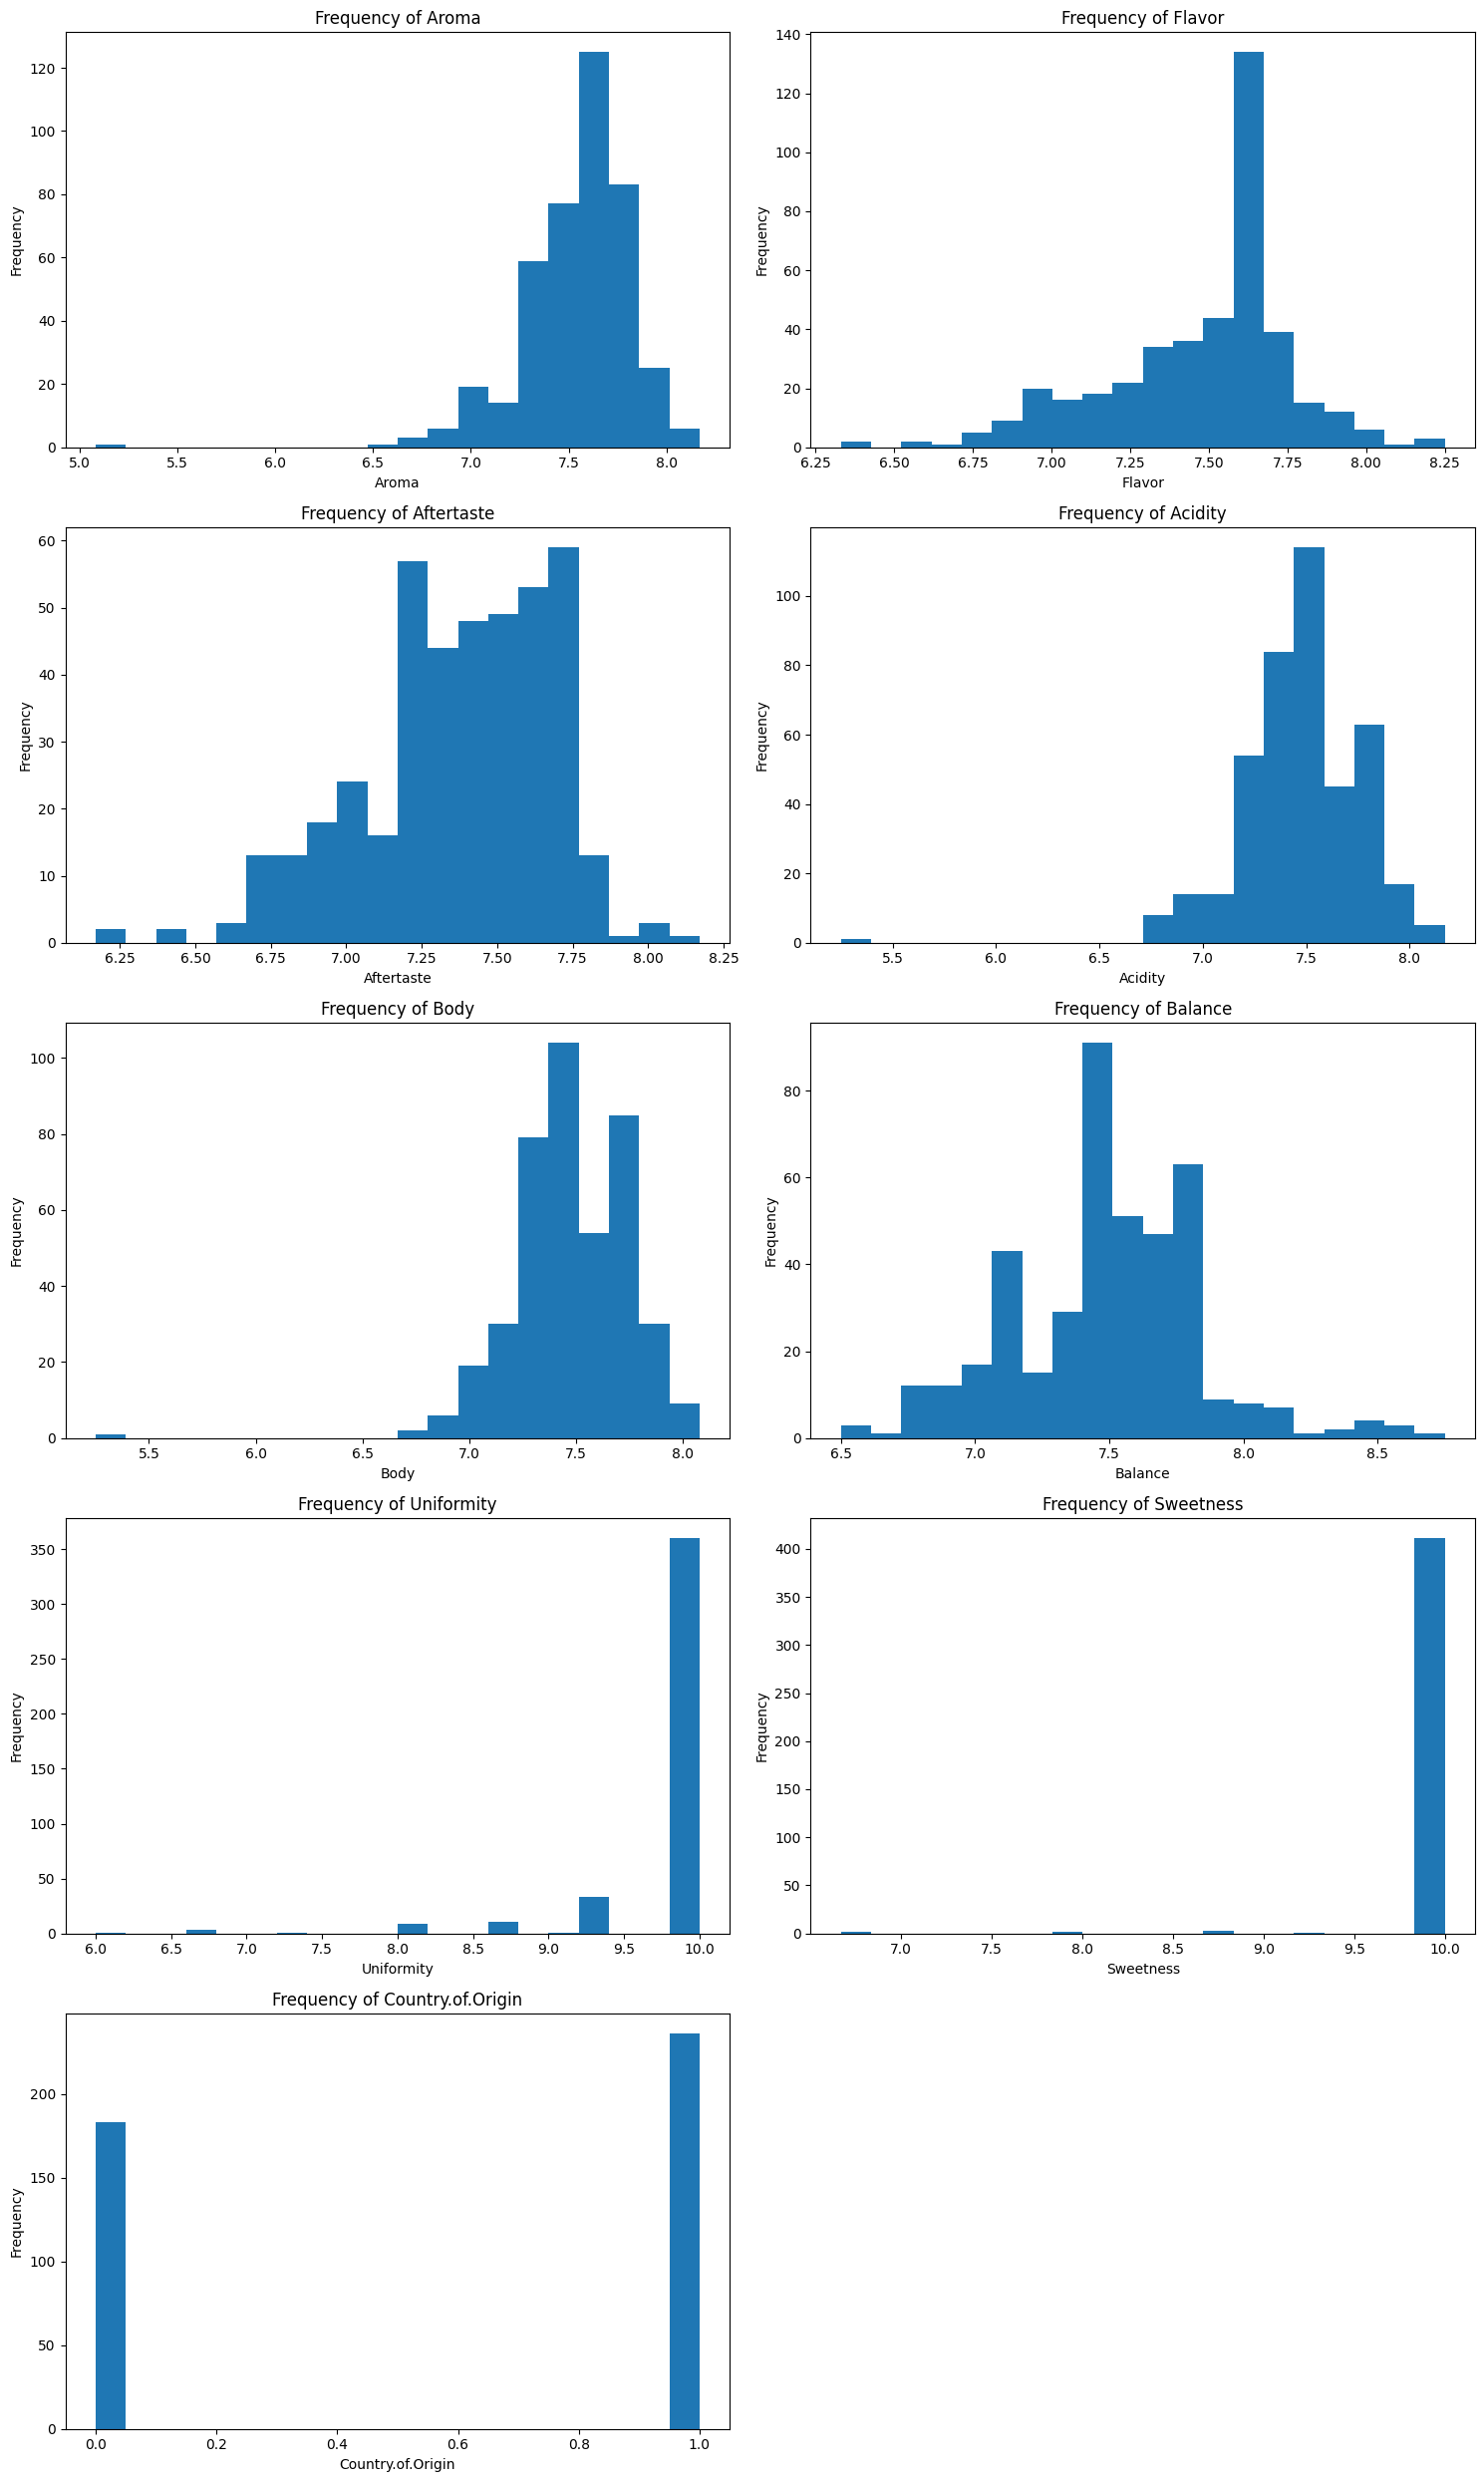

In [4]:
features = coffee.columns

# Create a grid of subplots
n = len(features)
ncols = 2  # Number of columns in the grid
nrows = (n + ncols - 1) // ncols  # Number of rows required

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D

for i, feature in enumerate(features):
    axes[i].hist(coffee[feature], bins=20)
    axes[i].set_title(f'Frequency of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [5]:
# use plotly to plot correlation matrix
import plotly.express as px

fig = px.imshow(coffee.corr())

fig.show()

### Wine dataset

The available features for wine are citric acid, sulphates,residual sugar, pH and alcohol.

Citric Acid, Sulphates, and Residual Sugar show irregular or skewed distributions, meaning certain characteristics might be rare or highly specific to certain wines.

The dataset seems relatively balanced for pH and alcohol.

The target feature for this dataset is type. The targets are balanced, which should be good for classification. 


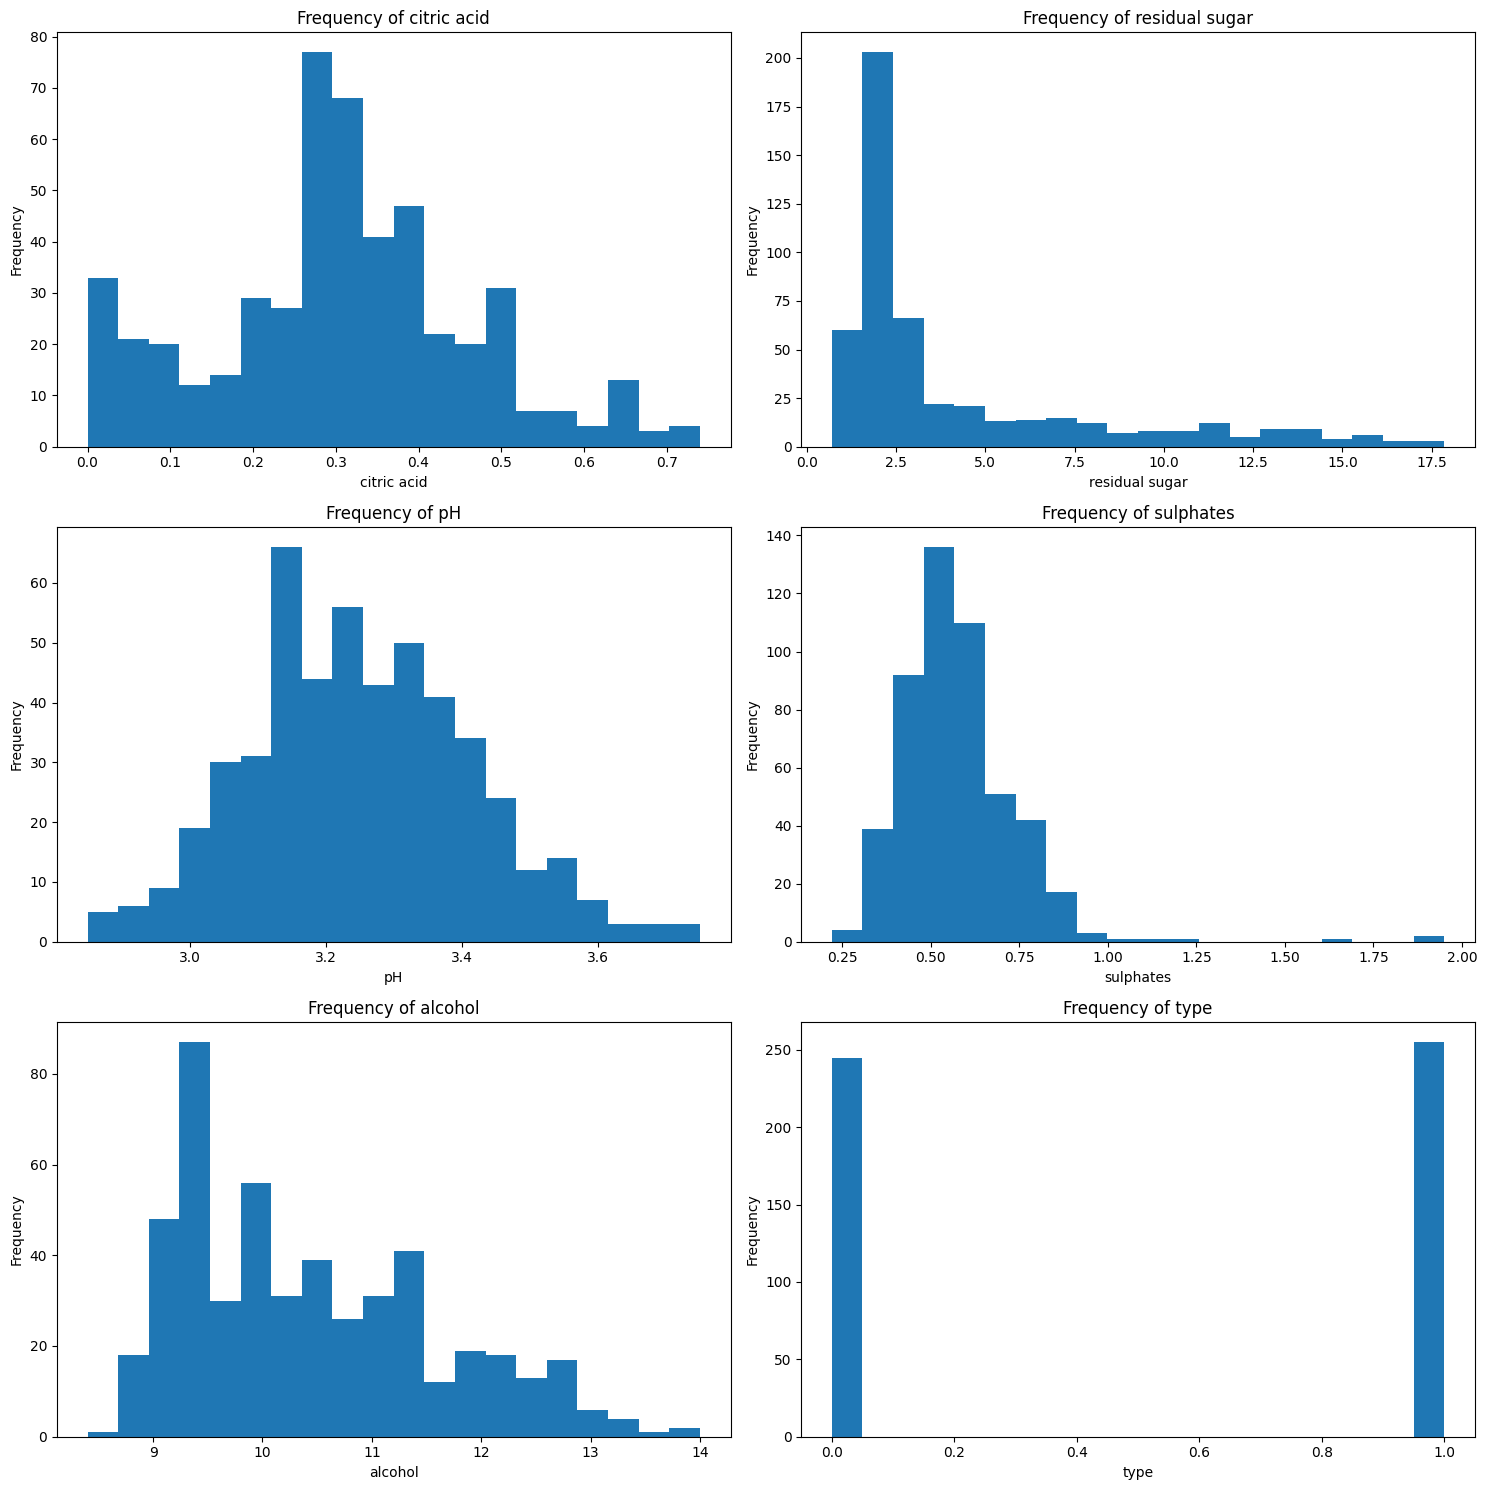

In [6]:
features = wine.columns

# Create a grid of subplots
n = len(features)
ncols = 2  # Number of columns in the grid
nrows = (n + ncols - 1) // ncols  # Number of rows required

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D

for i, feature in enumerate(features):
    axes[i].hist(wine[feature], bins=20)
    axes[i].set_title(f'Frequency of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [7]:
#plot correlation matrix
fig = px.imshow(wine.corr())

fig.show()

### Data preprocessing

We decided that further data preprocessing was unnecessary. Before applying the decision tree and random forest classifiers, we reviewed the datasets and determined that the data was already in a form that could be directly utilized by these algorithms. The key reasons are outlined below:

__Clean Data__:
Both the coffee and wine datasets appeared to be free of missing values or outliers that could heavily skew the models. Decision trees and random forests are relatively robust to outliers, as they focus on partitioning the feature space based on thresholds, so no preprocessing was required to handle potential noise in the data.

**Balanced Target Variables**:
As shown in the histograms, the target variables (Country of Origin for coffee and Type for wine) were relatively balanced, with both classes well-represented in the datasets. As a result, we did not need to do any processing here.

__Handling of Skewed Features__:
While some features showed slight skewness (e.g., residual sugar in wine, uniformity in coffee), the decision tree-based models used (both decision trees and random forests) are non-parametric. These models do not assume a normal distribution in the data, making them robust to skewness and non-linear relationships.

## Implementations

### Decision tree classifier:

We used the decision tree classifier to predict the type / country of origin of coffee and wine. The user is able to decide between a range of hyperparameters to tune the model:

| Hyperparameter | Description | Default value | Possible values |
| --- | --- | --- | --- |
| `max_depth` | The maximum depth of the tree | `None` | `None` or `int` |
| `criterion` | The function to measure the quality of a split | `gini` | `gini`, `entropy` |
| `max_features` | The maximum amount of features | `None` | `log2`, `sqrt` and `None` |
| `random_state` | The seed for all random functions | `0` | `int` |

#### How it works:

The decision tree classifier `fit` method operates by recursively splitting the dataset into subsets based on the feature that yields the most informative split. This process continues until the data is fully partitioned into subsets, effectively creating a tree structure. 

To evaluate the quality of each split, the classifier employs metrics such as Gini impurity or entropy to calculate the information gain we would get if this split was performed. More

Key parameters in the decision tree algorithm include:

max_depth: This parameter limits the depth of the tree, ensuring that no node exceeds a specified level. This helps prevent overfitting by controlling the complexity of the model. Formally, for any node $n$, the condition $n_{depth} \leq \text{max\char`_depth} $ must hold

max_features: This parameter specifies the maximum number of features to consider when searching for the best split at each node. By limiting the features, the algorithm introduces randomness, which can enhance model generalization.

random_state: This parameter serves as a seed for any random processes within the algorithm, ensuring reproducibility of results across different runs.


**Infomation gain (IG)**

We calculate IG for each feature and choose the feature with the highest IG to split the data on. The IG is calculated as follows:

$$IG(x, y) = H(y) - H(y|x)$$

Where:

- $IG(x, y)$ is the information gain

- $H(y)$ is the entropy/gini index of the target variable

- $H(y|x)$ is the conditional entropy/gini index of the target variable given the feature

**Prediction process**




### Random Forest classifier:

We built the RFC on top of the decision tree classifier. The way it works is that it uses bagging. This means that it trains multiple decision trees on different subsets of the data to reduce overfitting and increase diversity among the trees. The RFC uses the majority vote to make predictions. The following hyperparameters can be tuned:

| Hyperparameter | Description | Default value | Possible values |
| --- | --- | --- | --- |
| `n_estimators` | The number of trees to train | `100` | `int` |
| `max_depth` | The maximum depth of the tree | `None` | `None` or `int` |
| `criterion` | The function to measure the quality of a split | `gini` | `gini`, `entropy` |
| `max_features` | The maximum amount of features | `sqrt` | `log2`, `sqrt` and `None` |
| `random_state` | The seed for all random functions | `0` | `int` |



## Model selection and evaluation

We tuned the aforementioned hyperparameters using grid search. We use accuracy as the metric to evaluate the model. The reason why is because it is a simple metric that is easy to understand and works quite well, although it is prone to overfitting. However, this was mitigated by using cross-validation (from `sklearn GridSearchCV`) as well as using a random forest classifier (majority vote).

We need to figure out which model is the best for each dataset. The following steps will be taken:

- Split the data into a training and test set

- Tune hyperparameters for both models using grid search

- Evaluate the models using accuracy

- Choose the best model for each dataset


### Hyperparameter tuning for the decision tree classifier

| Hyperparameter | Potential values |
| --- | --- |
| `max_depth` | `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, None]` |
| `criterion` | `["entropy", "gini"]` |
| `max_features` | `["log2", "sqrt", None]` |

### Hyperparameter tuning for the random forest classifier

| Hyperparameter | Potential values |
| --- | --- |
| `n_estimators` | `[5, 6, 7, 8, 9, 10, 25, 30, 50, 75, 100]` |
| `max_depth` | `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, None]` |
| `criterion` | `["entropy", "gini"]` |
| `max_features` | `["log2", "sqrt", None]` |

## Wine dataset


We tune the hyperparameters by using Grid Search Cross Validation. We use the following hyperparameters: 



### Our decision tree classifier: 

| Hyperparameter | Value |
| --- | --- |
| `max_depth` | `None` |
| `criterion` | `entropy` |
| `max_features` | `None` |

### Our random forest classifier: 

| Hyperparameter | Value |
| --- | --- |
| `n_estimators` | `100` |
| `max_depth` | `5` |
| `criterion` | `entropy` |
| `max_features` | `sqrt` |

### SKLearn decision tree classifier: 

| Hyperparameter | Value |
| --- | --- |
| `max_depth` | `7` |
| `criterion` | `entropy` |
| `max_features` | `None` |

### SKLearn random forest classifier: 

| Hyperparameter | Value |
| --- | --- |
| `n_estimators` | `75` |
| `max_depth` | `9` |
| `criterion` | `entropy` |
| `max_features` | `log2` |

Our decision tree classifier best model score: Training = 1, validation = 0.84

Our random forest classifier best model score: Training = 0.9971, validation = 0.87333

SKLearn decision tree classifier best model score: Training = 0.9485, validation = 0.7866

SKLearn random forest classifier best model score: Training = 0.9971, validation = 0.87333





## Coffee dataset



We tune the hyperparameters by using Grid Search Cross Validation. We use the following hyperparameters: 

### Our decision tree classifier: 

| Hyperparameter | Value |
| --- | --- |
| `max_depth` | `None` |
| `criterion` | `entropy` |
| `max_features` | `None` |

### Our random forest classifier: 

| Hyperparameter | Value |
| --- | --- |
| `n_estimators` | `100` |
| `max_depth` | `5` |
| `criterion` | `entropy` |
| `max_features` | `sqrt` |

### SKLearn decision tree classifier: 

| Hyperparameter | Value |
| --- | --- |
| `max_depth` | `3` |
| `criterion` | `entropy` |
| `max_features` | `None` |

### SKLearn random forest classifier: 

| Hyperparameter | Value |
| --- | --- |
| `n_estimators` | `25` |
| `max_depth` | `4` |
| `criterion` | `entropy` |
| `max_features` | `None` |

Our decision tree classifier best model score: Training = 1, validation = 0.73

Our random forest classifier best model score: Training = 0.86, validation = 0.8015

SKLearn decision tree classifier best model score: Training = 0.8464, validation = 0.7936

SKLearn random forest classifier best model score: Training = 0.8737, validation = 0.8095





## Conclusion

Comparing the results, we can see that the random forest classifier is the best model for both datasets. The random forest classifier has a higher accuracy than the decision tree classifier. The random forest classifier is able to reduce overfitting by training multiple decision trees on different subsets of the data. We also observe that the SKLearn implementation of the RFC has a similar accuracy to our implementation. This shows that our implementation is more or less correct because SKLearn's implementation is well-tested and optimized. This applies to both datasets. 

We have successfully created a decision tree classifier and a random forest classifier to predict the type / country of origin of coffee and wine. We have tuned the hyperparameters for both models using grid search. We have evaluated the models using accuracy. We have chosen the best model for each dataset.

For next time it could be wise to clean the datasets to remove any statistical outliers in order to improve the accuracy of the models. We could also try to use other models to see if we can get better results. Having a wider spread of hyperparameters could also be beneficial. We chose not to do that because it would significantly worsen computational cost.